In [14]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [15]:
L = 512
D = 3
N = L * D

## Time-evolved entropy
Figure 2(a) from Li, Chen, and Fisher. Time dependence of bipartite entanglement entropy $S_A$ with $\left|A\right|=\frac{L}{2}=256$ and $L=512$, in the random Clifford circuit averaged over 100 circuit realizations, starting from either a maximally entangled state or the zero state.

In [16]:
depth = 300
shots = 10

ps = np.array([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.15, 0.20])

entropies_zero = {}
entropies_me = {}

for p in ps:
    try:
        stub = "data/{}_{}_{}_{}_{}_".format(L, depth, shots, p, D)
        entropies_zero[p] = np.load(stub + "zero.npy")
        entropies_me[p] = np.load(stub + "me.npy")
    except:
        print("No data for p = {}".format(p))
        continue

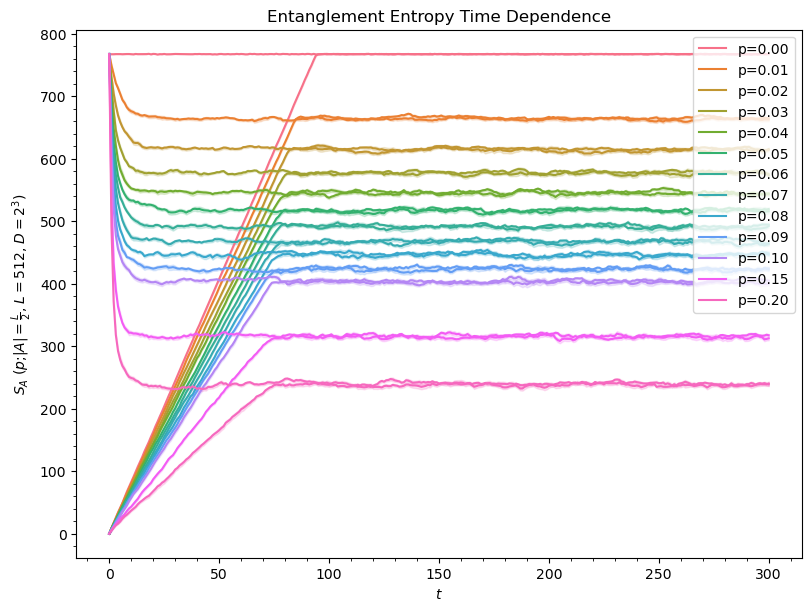

In [17]:
colors = sns.color_palette("husl", len(ps))
plt.subplots(figsize = (8, 6), layout = "constrained")
t = np.arange(depth + 1)

for i, p in enumerate(ps):
    try:
        plt.plot(t, entropies_zero[p][0], label="p={:.2f}".format(p), color=colors[i])
        plt.fill_between(t, entropies_zero[p][0]-entropies_zero[p][1], entropies_zero[p][0]+entropies_zero[p][1], alpha=0.2, color=colors[i])
        plt.plot(t, entropies_me[p][0], color=colors[i])
        plt.fill_between(t, entropies_me[p][0]-entropies_me[p][1], entropies_me[p][0]+entropies_me[p][1], alpha=0.2, color=colors[i])
    except:
        continue

plt.title("Entanglement Entropy Time Dependence")
plt.xlabel(r"$t$")
plt.ylabel("$S_A$ ($p$;$\left|A\\right|=\\frac{{L}}{{2}}$, $L={}$, $D=2^{{{}}}$)".format(L, D))
plt.legend(loc = "upper right")
# plt.xlim(-25, 1050)
# plt.ylim(-5, 270)
plt.minorticks_on()
plt.savefig("figs/{}_{}_{}_{}_{}_time.png".format(L, depth, shots, p, D))

## Entropy distribution
Figure 2(b) from Li, Chen, and Fisher. Distribution function of $S_A$ with $\left|A\right|=\frac{L}{2}=256$ and $L=512$, for 1000 different circuit realizations, and over time after saturation $t=256$. The solid lines are fits to a normal distribution.

In [18]:
depth = 256
shots = 100

entropies_hist = {}
ps = [0.02 * i for i in range(1, 11)]

for p in ps:
    try:
        stub = "data/{}_{}_{}_{}_{}_".format(L, depth, shots, p, D)
        entropies_hist[p] = np.load(stub + "hist.npy")
    except:
        print("No data for p = {}".format(p))
        continue

No data for p = 0.06
No data for p = 0.08
No data for p = 0.1
No data for p = 0.12
No data for p = 0.14
No data for p = 0.16
No data for p = 0.18
No data for p = 0.2


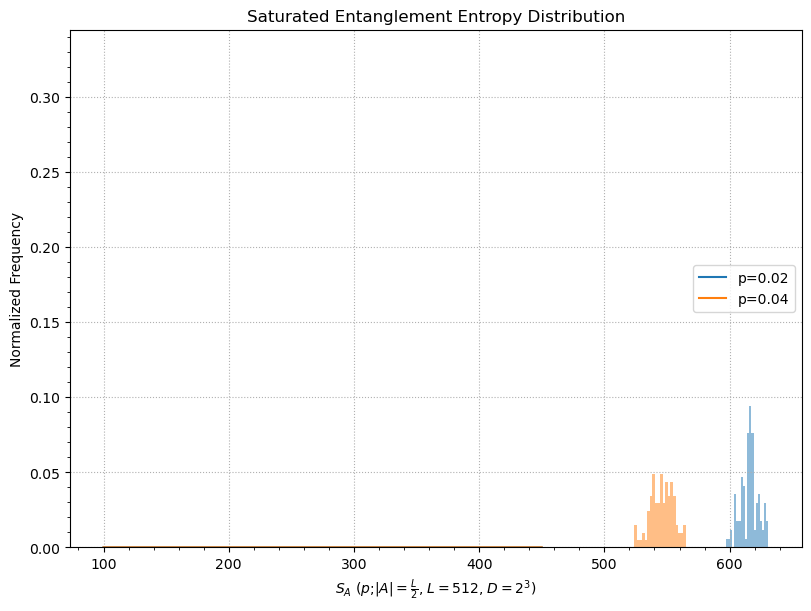

In [19]:
colors = sns.color_palette("tab10")
plt.subplots(figsize = (8, 6), layout = "constrained")
x = np.arange(100, 450, 0.1)

for i, p in enumerate(ps):
    try:
        entropies = entropies_hist[p]
        plt.hist(entropies, bins = 20, color=colors[i], alpha=0.5, density = True)
        plt.plot(x, norm.pdf(x, *norm.fit(entropies)), color=colors[i], label="p={}".format(p))
    except:
        continue

plt.title("Saturated Entanglement Entropy Distribution")
plt.xlabel("$S_A$ ($p$;$\left|A\\right|=\\frac{{L}}{{2}}$, $L={}$, $D=2^{{{}}}$)".format(L, D))
plt.ylabel("Normalized Frequency")
plt.legend(loc = "right")
plt.ylim(0, 0.345)
plt.minorticks_on()
plt.grid(linestyle = ":")
plt.savefig("figs/{}_{}_{}_{}_{}_hist.png".format(L, depth, shots, p, D))